In [1]:
import warnings 
warnings.filterwarnings('ignore')

# Importing all the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Importing the Dataset

In [3]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

# Understanding the Dataset

In [4]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Here we can see that there are some negative values in the Experience column. And there are no proper explanation of why there are some negative values in this particular column, So i decide to replace only those negative numbers to 0 as it may increase the accuracy of my Model.

In [6]:
for column in df:
    df[column][df[column] < 0] = 0
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
df.isnull().values.any()

False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


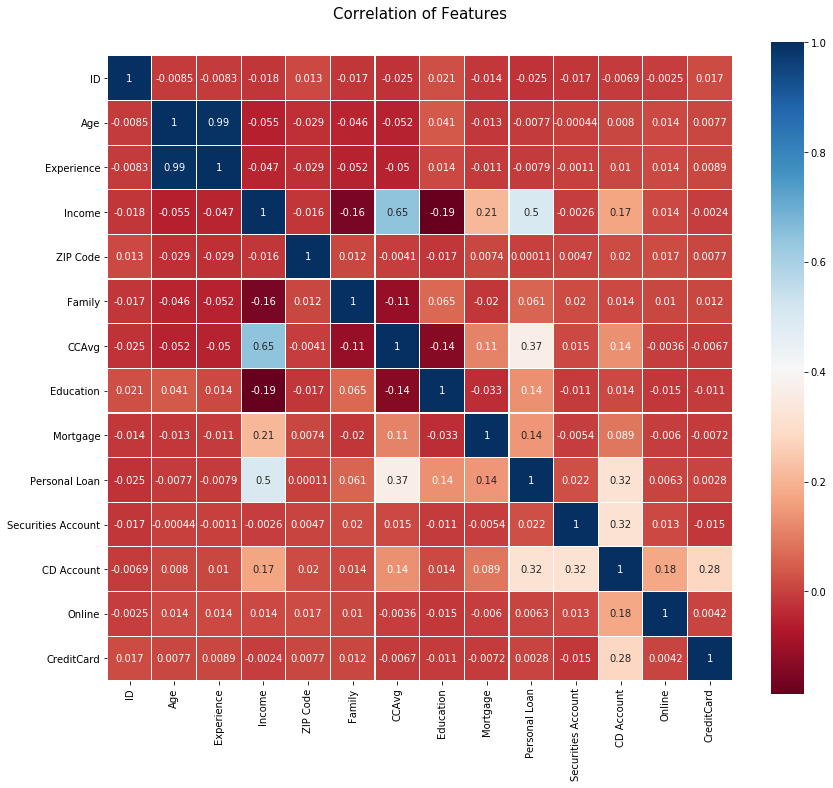

In [9]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(df._get_numeric_data().astype(float).corr(),linewidths=0.2,vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)

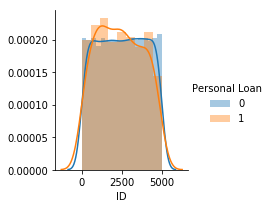

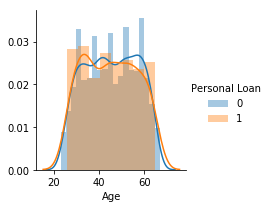

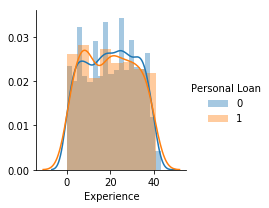

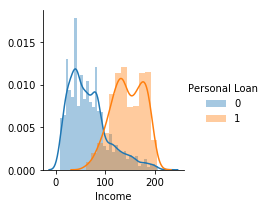

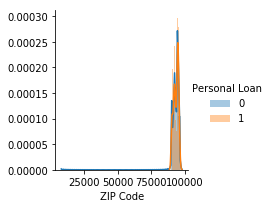

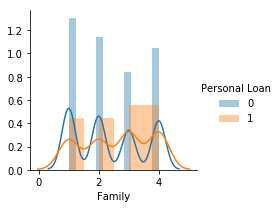

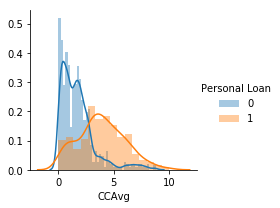

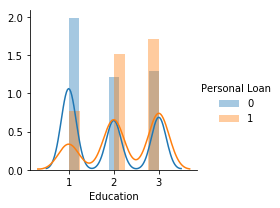

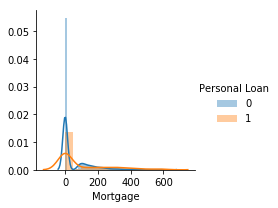

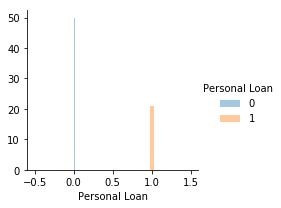

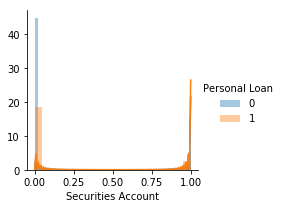

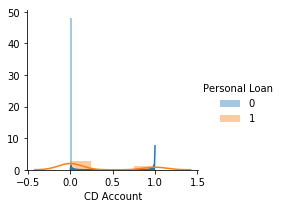

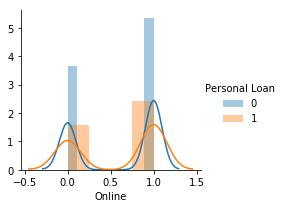

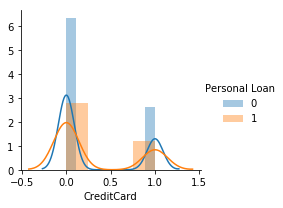

In [10]:
for column in df:
    sns.FacetGrid(df,hue='Personal Loan',height=3).map(sns.distplot,column).add_legend()

Based on the dataset and the problem, I can clearly see that the bank is considering many factors to increase its loan customers.So Target variable is 'Personal Loan' and 1 means it is success and 0 means failure. I have considered 0 as failure as the successrate was very low which was mentioned in the problem.

# Splitting the Dataset

In [11]:
X=df.drop(['ID'], axis=1)
Y=df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=275)

# Using different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

First for KNN trying to find the optimal number of Neighbors

In [12]:
Numbers = [1,3,5,7,9,11,13,15,17,19]

cv_scores = []

for k in Numbers:
    knn_CV = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_CV, X, Y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

print("Average score:" , np.average(cv_scores))

MSE = [1 - x for x in cv_scores]

optimal_k = Numbers[MSE.index(min(MSE))]
print ('The optimal number of neighbors is',optimal_k)

Average score: 0.8978800000000001
The optimal number of neighbors is 7


Now creating different models and comparing them with each other

In [13]:
modelLR = LogisticRegression()
modelKNN = KNeighborsClassifier(n_neighbors=optimal_k)
modelGB = GaussianNB()

modelLR.fit(X_train,y_train)
print('Logistic Regression',modelLR.score(X_test,y_test))

modelKNN.fit(X_train,y_train)
print('KNN',modelKNN.score(X_test,y_test))

modelGB.fit(X_train,y_train)
print('Naive Bayes',modelGB.score(X_test,y_test))

Logistic Regression 0.892
KNN 0.8853333333333333
Naive Bayes 1.0


# Printing the confusion matrix for all the above models

In [14]:
expected = y_test

predicted = modelLR.predict(X_test)
print('Logistic Regression \n',metrics.confusion_matrix(expected,predicted))

predicted = modelKNN.predict(X_test)
print('KNN \n',metrics.confusion_matrix(expected,predicted))

predicted = modelGB.predict(X_test)
print('Naive Bayes \n',metrics.confusion_matrix(expected,predicted))

Logistic Regression 
 [[1282   48]
 [ 114   56]]
KNN 
 [[1297   33]
 [ 139   31]]
Naive Bayes 
 [[1330    0]
 [   0  170]]


# Best model and the reason of why it is

We have 3 model and their accuracies and we can come to some conclusions based on this,
    We can see that the Naive Bayes model is an over fitted model.
    We can also see that comparing the other two models Logistic Regression model has better accuracy.

The reason for why i chose Logistic Regression as the best model is, it considers the relationship between all the features and then predict whereas in KNN model it considers every feature as independent. So for this particular problem i think Logistic Regression serves a better purpose.